# Gameplay Episode Data Analysis

This notebook provides exploratory data analysis (EDA) for gameplay recordings captured with the Siphon pipeline.


In [39]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from typing import Dict, List

# Set plotting style
sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize'] = (12, 6)

## 1. Load Recording Data

Load a single episode or multiple episodes for analysis.


In [40]:
## 1. Load Recording Data
recording_path = "../recordings/episode_0004_cond0_rec_1762585765527_6033.h5"

h5_file = h5py.File(recording_path, 'r')
print(f"Loaded: {recording_path}")
print(f"File size: {Path(recording_path).stat().st_size / 1024 / 1024:.2f} MB")

Loaded: ../recordings/episode_0004_cond0_rec_1762585765527_6033.h5
File size: 5710.10 MB


In [41]:
# Explore the H5 file structure
print("Top-level keys:")
for key in h5_file.keys():
    dataset = h5_file[key]
    print(f"  {key}: shape={dataset.shape}, dtype={dataset.dtype}")
    
# Check for metadata attributes
print("\nFile metadata:")
for attr_name, attr_value in h5_file.attrs.items():
    print(f"  {attr_name}: {attr_value}")

Top-level keys:
  frames: shape=(322, 2160, 3840, 4), dtype=uint8
  inputs: shape=(322, 300), dtype=uint8
  latencies: shape=(322, 5), dtype=float32
  memory_data: shape=(322, 19), dtype=float32
  timestamps: shape=(322,), dtype=int64

File metadata:


In [42]:
print(h5_file['inputs'].attrs['key_mapping'])

['B' 'MOUSE_LEFT' 'W' 'A' 'MOUSE_BUTTON5' 'LEFT_SHIFT' 'S' 'D']


In [43]:
# Extract memory data (game attributes)
memory_data = h5_file['memory_data'][:]
timestamps = h5_file['timestamps'][:]

# Get attribute names from metadata
if 'attribute_names' in h5_file['memory_data'].attrs:
    attribute_names = h5_file['memory_data'].attrs['attribute_names']
    if isinstance(attribute_names[0], bytes):
        attribute_names = [name.decode('utf-8') for name in attribute_names]
else:
    # Fallback: try to infer from shape
    attribute_names = [f"Attr_{i}" for i in range(memory_data.shape[1])]

print(f"Recording info:")
print(f"  Total frames: {len(memory_data)}")
print(f"  Attributes tracked: {len(attribute_names)}")
print(f"  Duration: {timestamps[-1] - timestamps[0]:.2f} seconds")
print(f"  Average FPS: {len(timestamps) / (timestamps[-1] - timestamps[0]):.2f}")

print(f"\nAttributes: {', '.join(attribute_names)}")


Recording info:
  Total frames: 322
  Attributes tracked: 19
  Duration: 102702.00 seconds
  Average FPS: 0.00

Attributes: HeroHp, HeroMaxHp, HeroSp, HeroMaxSp, HeroFp, HeroMaxFp, HeroGlobalPosX, HeroGlobalPosY, HeroGlobalPosZ, HeroAngle, HeroAnimId, NpcHp, NpcMaxHp, NpcId, NpcGlobalPosX, NpcGlobalPosY, NpcGlobalPosZ, NpcGlobalPosAngle, NpcAnimId


In [44]:
# Create a DataFrame for easier analysis
df = pd.DataFrame(memory_data, columns=attribute_names)
df['timestamp'] = timestamps
df['frame'] = range(len(df))
df['time_elapsed'] = df['timestamp'] - df['timestamp'].iloc[0]

print("DataFrame preview:")
df.head(10)


DataFrame preview:


,HeroHp,HeroMaxHp,HeroSp,HeroMaxSp,HeroFp,HeroMaxFp,HeroGlobalPosX,HeroGlobalPosY,HeroGlobalPosZ,HeroAngle,...,NpcMaxHp,NpcId,NpcGlobalPosX,NpcGlobalPosY,NpcGlobalPosZ,NpcGlobalPosAngle,NpcAnimId,timestamp,frame,time_elapsed
0,2226.0,2226.0,96.0,96.0,78.0,78.0,18.518055,-11.832647,-7.051832,0.986640,...,4174.0,213000.0,-46.523247,-16.709703,4.886017,1.0,2002000.0,1762585765549,0,0
1,2226.0,2226.0,96.0,96.0,78.0,78.0,7.541365,-13.756868,-5.349994,1.432976,...,4174.0,213000.0,-46.327148,-16.701584,4.861985,1.0,2002000.0,1762585768693,1,3144
2,2226.0,2226.0,96.0,96.0,78.0,78.0,7.090746,-13.830259,-5.301427,1.383062,...,4174.0,213000.0,-46.094555,-16.719389,4.831637,1.0,2002000.0,1762585768805,2,3256
3,2226.0,2226.0,96.0,96.0,78.0,78.0,6.704481,-13.912668,-5.260308,1.432445,...,4174.0,213000.0,-45.886509,-16.751362,4.803415,1.0,2002000.0,1762585768914,3,3365
4,2226.0,2226.0,96.0,96.0,78.0,78.0,6.252703,-13.982601,-5.212302,1.431380,...,4174.0,213000.0,-45.725857,-16.771334,4.781939,1.0,2002000.0,1762585769026,4,3477
5,2226.0,2226.0,96.0,96.0,78.0,78.0,5.801901,-14.067554,-5.106736,1.384832,...,4174.0,213000.0,-45.537086,-16.771578,4.758263,1.0,2002000.0,1762585769133,5,3584
6,2226.0,2226.0,96.0,96.0,78.0,78.0,5.415516,-14.140223,-5.107031,1.384970,...,4174.0,213000.0,-45.368019,-16.758589,4.737946,1.0,2002000.0,1762585769248,6,3699
7,2226.0,2226.0,96.0,96.0,78.0,78.0,5.028118,-14.218838,-5.081796,1.432609,...,4174.0,213000.0,-45.200989,-16.737127,4.718363,1.0,2002000.0,1762585769347,7,3798
8,2226.0,2226.0,96.0,96.0,78.0,78.0,4.641714,-14.291375,-5.030044,1.434587,...,4174.0,213000.0,-45.033127,-16.709293,4.698921,1.0,2002000.0,1762585769449,8,3900
9,2226.0,2226.0,96.0,96.0,78.0,78.0,4.190903,-14.376081,-4.962906,1.385036,...,4174.0,213000.0,-44.802887,-16.663960,4.672718,1.0,2002000.0,1762585769551,9,4002


## 3. Statistical Summary


In [45]:
# Statistical summary of all attributes
df[attribute_names].describe()


,HeroHp,HeroMaxHp,HeroSp,HeroMaxSp,HeroFp,HeroMaxFp,HeroGlobalPosX,HeroGlobalPosY,HeroGlobalPosZ,HeroAngle,HeroAnimId,NpcHp,NpcMaxHp,NpcId,NpcGlobalPosX,NpcGlobalPosY,NpcGlobalPosZ,NpcGlobalPosAngle,NpcAnimId
count,322.000000,322.0,322.000000,322.0,322.0,322.0,322.000000,322.000000,322.000000,322.000000,322.0,322.000000,322.0,322.0,322.000000,322.000000,322.000000,322.0,3.220000e+02
mean,1477.490723,2226.0,80.273293,96.0,78.0,78.0,-1.642395,-16.265848,-4.143747,0.011827,13103226.0,2977.829102,4174.0,213000.0,-4.257137,-8.064631,4.048995,1.0,2.004008e+06
std,744.554810,0.0,18.807928,0.0,0.0,0.0,3.981506,2.524006,0.474755,1.985068,9762347.0,995.691040,0.0,0.0,10.963104,3.727829,0.889359,0.0,2.435371e+03
min,90.000000,2226.0,29.000000,96.0,78.0,78.0,-7.162223,-26.114325,-7.051832,-3.101129,5100.0,317.000000,4174.0,213000.0,-46.523247,-22.123827,1.754459,1.0,2.002000e+06
25%,839.000000,2226.0,69.000000,96.0,78.0,78.0,-4.478581,-17.398330,-4.278669,-2.161231,27102.0,2358.000000,4174.0,213000.0,-5.021285,-9.247244,3.786109,1.0,2.003007e+06
50%,1706.000000,2226.0,84.500000,96.0,78.0,78.0,-2.953517,-15.939290,-4.111418,0.547693,12020100.0,3310.000000,4174.0,213000.0,-3.873986,-7.463920,3.972426,1.0,2.003021e+06
75%,2226.000000,2226.0,96.000000,96.0,78.0,78.0,1.302667,-14.860358,-3.923963,1.732145,25032000.0,3742.000000,4174.0,213000.0,0.822888,-5.945019,4.190202,1.0,2.003029e+06
max,2226.000000,2226.0,96.000000,96.0,78.0,78.0,18.518055,-6.634585,-2.539853,3.134472,25032300.0,4174.000000,4174.0,213000.0,12.431520,-0.616983,9.781631,1.0,2.011060e+06


## 4. Health & Resource Visualization

Visualize player health, stamina, FP, and enemy health over time.


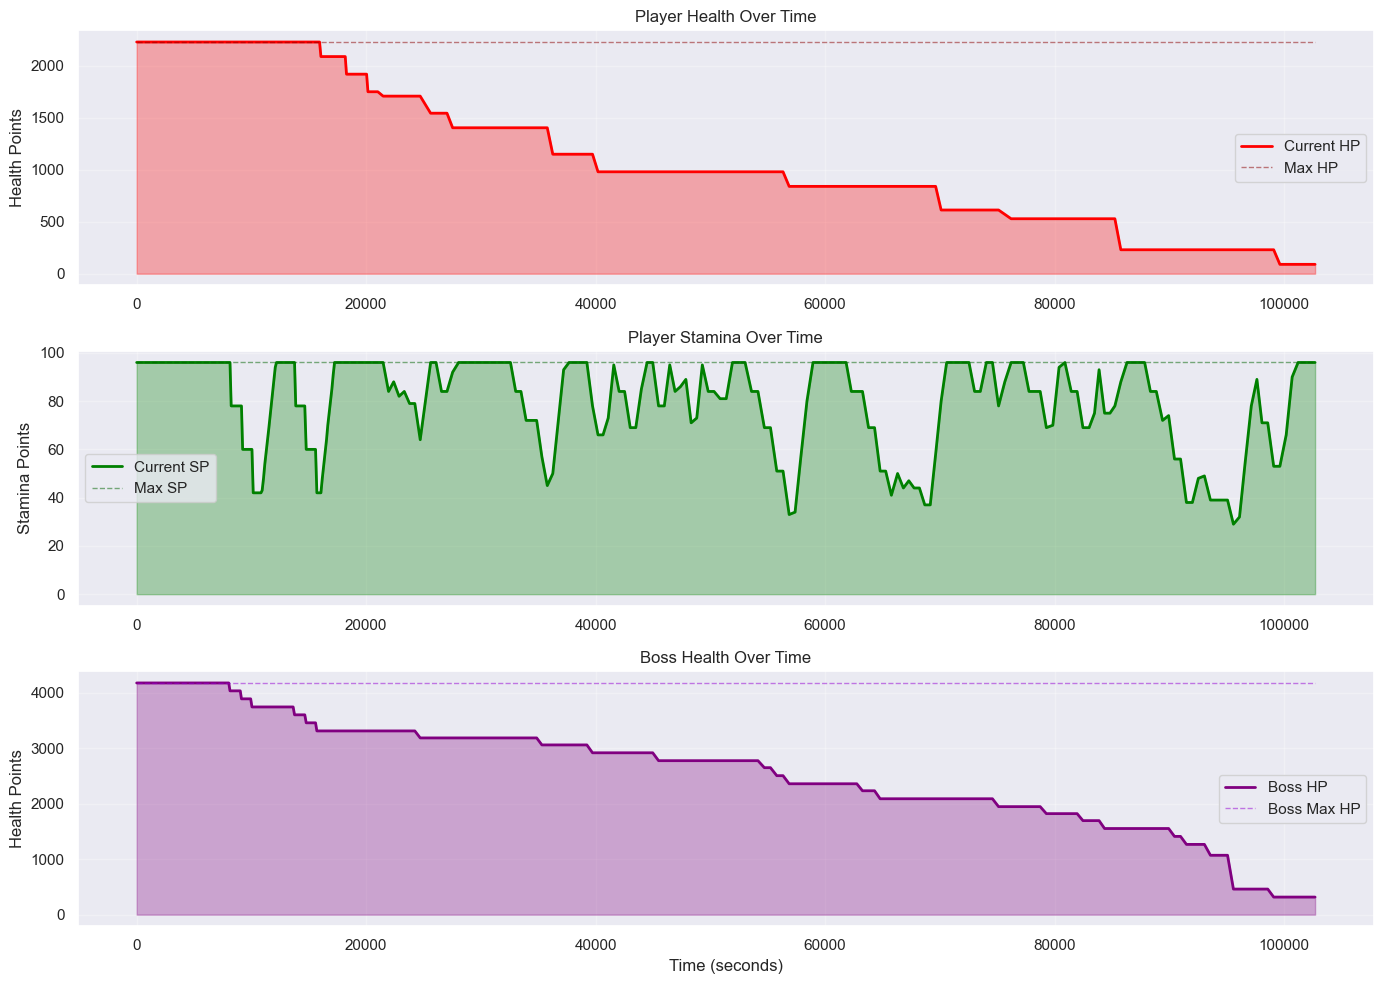

In [46]:
# Plot health and resources over time
fig, axes = plt.subplots(3, 1, figsize=(14, 10))

# Player Health
if 'HeroHp' in df.columns and 'HeroMaxHp' in df.columns:
    axes[0].plot(df['time_elapsed'], df['HeroHp'], label='Current HP', linewidth=2, color='red')
    axes[0].plot(df['time_elapsed'], df['HeroMaxHp'], label='Max HP', linewidth=1, linestyle='--', color='darkred', alpha=0.5)
    axes[0].fill_between(df['time_elapsed'], 0, df['HeroHp'], alpha=0.3, color='red')
    axes[0].set_ylabel('Health Points')
    axes[0].set_title('Player Health Over Time')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)

# Player Stamina
if 'HeroSp' in df.columns and 'HeroMaxSp' in df.columns:
    axes[1].plot(df['time_elapsed'], df['HeroSp'], label='Current SP', linewidth=2, color='green')
    axes[1].plot(df['time_elapsed'], df['HeroMaxSp'], label='Max SP', linewidth=1, linestyle='--', color='darkgreen', alpha=0.5)
    axes[1].fill_between(df['time_elapsed'], 0, df['HeroSp'], alpha=0.3, color='green')
    axes[1].set_ylabel('Stamina Points')
    axes[1].set_title('Player Stamina Over Time')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)

# Enemy Health (if available)
if 'NpcHp' in df.columns and 'NpcMaxHp' in df.columns:
    axes[2].plot(df['time_elapsed'], df['NpcHp'], label='Boss HP', linewidth=2, color='purple')
    axes[2].plot(df['time_elapsed'], df['NpcMaxHp'], label='Boss Max HP', linewidth=1, linestyle='--', color='darkviolet', alpha=0.5)
    axes[2].fill_between(df['time_elapsed'], 0, df['NpcHp'], alpha=0.3, color='purple')
    axes[2].set_ylabel('Health Points')
    axes[2].set_title('Boss Health Over Time')
    axes[2].set_xlabel('Time (seconds)')
    axes[2].legend()
    axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## 5. Position & Movement Analysis

Analyze player and enemy positions and movement patterns.


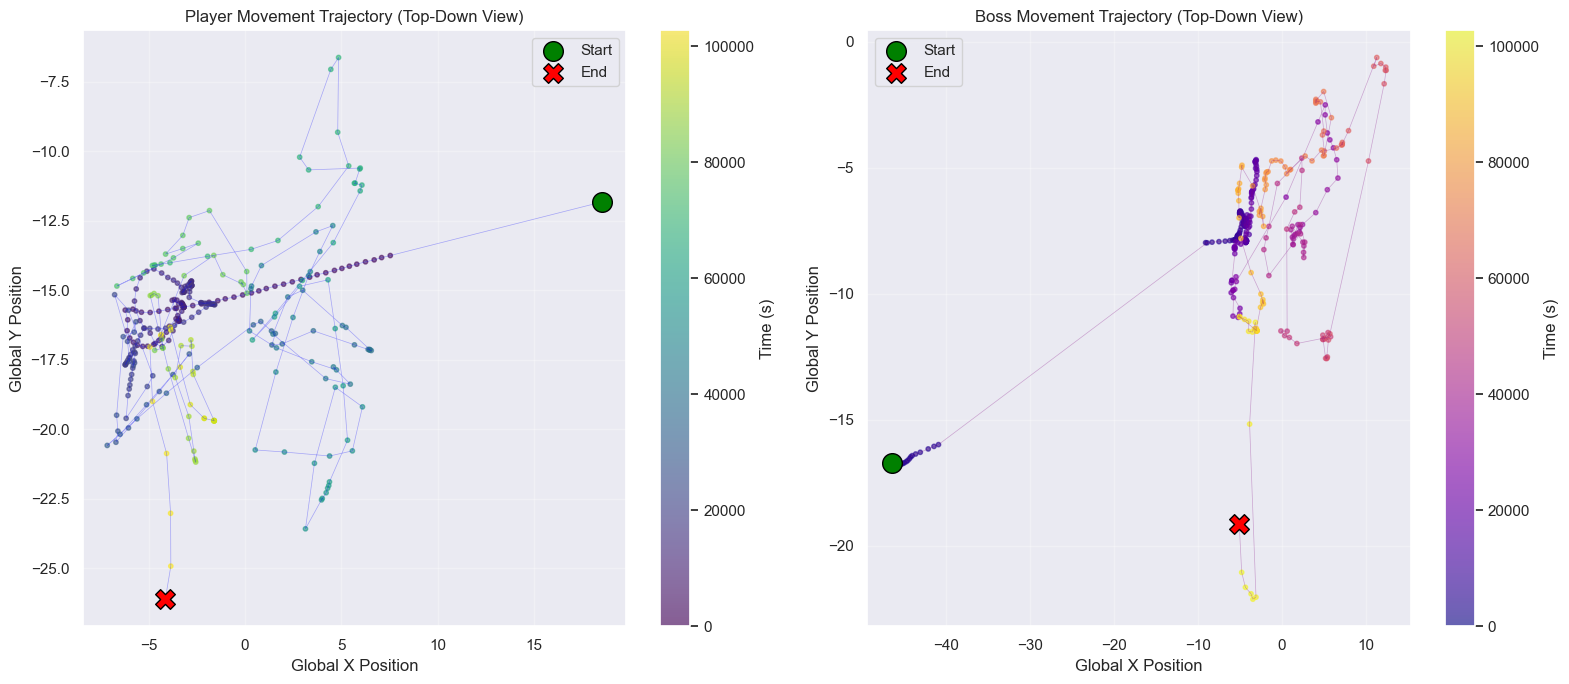

In [47]:
# Plot 2D movement (X-Y plane, top-down view)
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Player movement trajectory
if all(col in df.columns for col in ['HeroGlobalPosX', 'HeroGlobalPosY']):
    scatter = axes[0].scatter(df['HeroGlobalPosX'], df['HeroGlobalPosY'], 
                              c=df['time_elapsed'], cmap='viridis', 
                              s=10, alpha=0.6)
    axes[0].plot(df['HeroGlobalPosX'], df['HeroGlobalPosY'], 
                 linewidth=0.5, alpha=0.3, color='blue')
    axes[0].set_xlabel('Global X Position')
    axes[0].set_ylabel('Global Y Position')
    axes[0].set_title('Player Movement Trajectory (Top-Down View)')
    axes[0].grid(True, alpha=0.3)
    plt.colorbar(scatter, ax=axes[0], label='Time (s)')
    
    # Mark start and end
    axes[0].scatter(df['HeroGlobalPosX'].iloc[0], df['HeroGlobalPosY'].iloc[0], 
                    color='green', s=200, marker='o', label='Start', zorder=5, edgecolors='black')
    axes[0].scatter(df['HeroGlobalPosX'].iloc[-1], df['HeroGlobalPosY'].iloc[-1], 
                    color='red', s=200, marker='X', label='End', zorder=5, edgecolors='black')
    axes[0].legend()

# Boss position (if available)
if all(col in df.columns for col in ['NpcGlobalPosX', 'NpcGlobalPosY']):
    scatter2 = axes[1].scatter(df['NpcGlobalPosX'], df['NpcGlobalPosY'], 
                               c=df['time_elapsed'], cmap='plasma', 
                               s=10, alpha=0.6)
    axes[1].plot(df['NpcGlobalPosX'], df['NpcGlobalPosY'], 
                 linewidth=0.5, alpha=0.3, color='purple')
    axes[1].set_xlabel('Global X Position')
    axes[1].set_ylabel('Global Y Position')
    axes[1].set_title('Boss Movement Trajectory (Top-Down View)')
    axes[1].grid(True, alpha=0.3)
    plt.colorbar(scatter2, ax=axes[1], label='Time (s)')
    
    # Mark start and end
    axes[1].scatter(df['NpcGlobalPosX'].iloc[0], df['NpcGlobalPosY'].iloc[0], 
                    color='green', s=200, marker='o', label='Start', zorder=5, edgecolors='black')
    axes[1].scatter(df['NpcGlobalPosX'].iloc[-1], df['NpcGlobalPosY'].iloc[-1], 
                    color='red', s=200, marker='X', label='End', zorder=5, edgecolors='black')
    axes[1].legend()

plt.tight_layout()
plt.show()


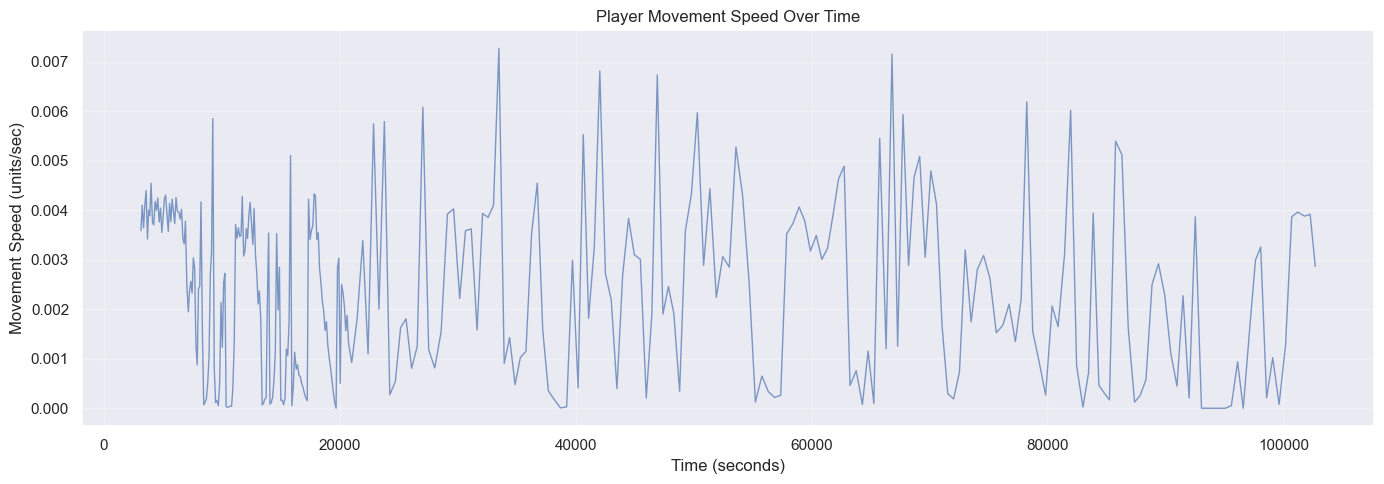

Average speed: 0.00 units/sec
Max speed: 0.01 units/sec


In [48]:
# Calculate movement speed
if all(col in df.columns for col in ['HeroGlobalPosX', 'HeroGlobalPosY', 'HeroGlobalPosZ']):
    df['hero_velocity'] = np.sqrt(
        df['HeroGlobalPosX'].diff()**2 + 
        df['HeroGlobalPosY'].diff()**2 + 
        df['HeroGlobalPosZ'].diff()**2
    ) / df['timestamp'].diff()
    
    plt.figure(figsize=(14, 5))
    plt.plot(df['time_elapsed'], df['hero_velocity'], linewidth=1, alpha=0.7)
    plt.xlabel('Time (seconds)')
    plt.ylabel('Movement Speed (units/sec)')
    plt.title('Player Movement Speed Over Time')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print(f"Average speed: {df['hero_velocity'].mean():.2f} units/sec")
    print(f"Max speed: {df['hero_velocity'].max():.2f} units/sec")


## 6. Combat Analysis

Analyze damage dealt, health changes, and combat patterns.


Total damage taken: 2136
Number of hits taken: 15
Average damage per hit: 142.40
Max single hit: 298

Total damage dealt to boss: 3857
Number of hits dealt: 24
Average damage per hit: 160.71
Max single hit: 609


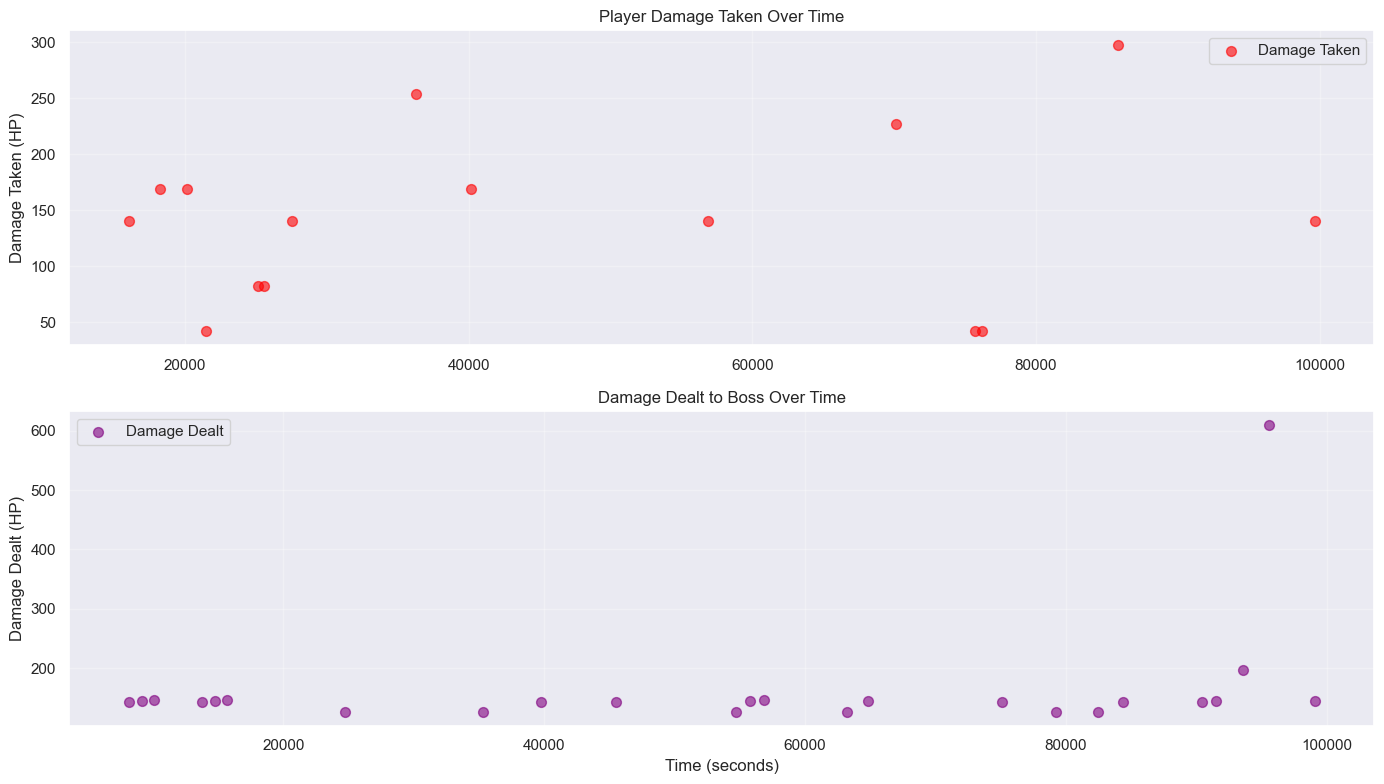

In [49]:
# Calculate damage taken and dealt
if 'HeroHp' in df.columns:
    df['hero_hp_change'] = df['HeroHp'].diff()
    df['hero_damage_taken'] = -df['hero_hp_change'].where(df['hero_hp_change'] < 0, 0)
    
if 'NpcHp' in df.columns:
    df['npc_hp_change'] = df['NpcHp'].diff()
    df['damage_dealt_to_boss'] = -df['npc_hp_change'].where(df['npc_hp_change'] < 0, 0)
    
# Plot damage over time
fig, axes = plt.subplots(2, 1, figsize=(14, 8))

if 'hero_damage_taken' in df.columns:
    damage_frames = df[df['hero_damage_taken'] > 0]
    axes[0].scatter(damage_frames['time_elapsed'], damage_frames['hero_damage_taken'], 
                    color='red', s=50, alpha=0.6, label='Damage Taken')
    axes[0].set_ylabel('Damage Taken (HP)')
    axes[0].set_title('Player Damage Taken Over Time')
    axes[0].grid(True, alpha=0.3)
    axes[0].legend()
    
    print(f"Total damage taken: {df['hero_damage_taken'].sum():.0f}")
    print(f"Number of hits taken: {len(damage_frames)}")
    if len(damage_frames) > 0:
        print(f"Average damage per hit: {df['hero_damage_taken'].sum() / len(damage_frames):.2f}")
        print(f"Max single hit: {df['hero_damage_taken'].max():.0f}")

if 'damage_dealt_to_boss' in df.columns:
    damage_dealt_frames = df[df['damage_dealt_to_boss'] > 0]
    axes[1].scatter(damage_dealt_frames['time_elapsed'], damage_dealt_frames['damage_dealt_to_boss'], 
                    color='purple', s=50, alpha=0.6, label='Damage Dealt')
    axes[1].set_xlabel('Time (seconds)')
    axes[1].set_ylabel('Damage Dealt (HP)')
    axes[1].set_title('Damage Dealt to Boss Over Time')
    axes[1].grid(True, alpha=0.3)
    axes[1].legend()
    
    print(f"\nTotal damage dealt to boss: {df['damage_dealt_to_boss'].sum():.0f}")
    print(f"Number of hits dealt: {len(damage_dealt_frames)}")
    if len(damage_dealt_frames) > 0:
        print(f"Average damage per hit: {df['damage_dealt_to_boss'].sum() / len(damage_dealt_frames):.2f}")
        print(f"Max single hit: {df['damage_dealt_to_boss'].max():.0f}")

plt.tight_layout()
plt.show()


## 7. Animation Analysis

Track animation IDs to understand player actions and boss attack patterns.


Total unique player animations: 24
Total animation changes: 100

Top 10 most common player animations:
HeroAnimId
12020100.0    91
25032000.0    33
25032010.0    29
27100.0       26
25032020.0    23
5301.0        22
12020102.0    19
25032300.0    15
25031750.0     8
5302.0         7
Name: count, dtype: int64


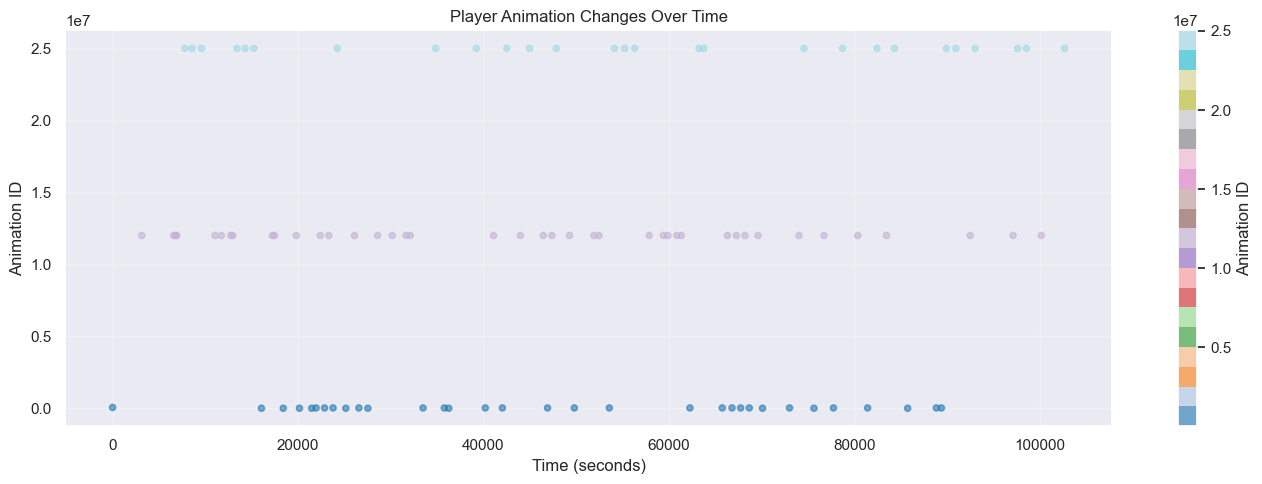

In [50]:
# Analyze player animations
if 'HeroAnimId' in df.columns:
    # Find when animations change (new action started)
    df['anim_changed'] = df['HeroAnimId'].diff() != 0
    
    # Count unique animations
    unique_anims = df['HeroAnimId'].value_counts()
    
    print(f"Total unique player animations: {len(unique_anims)}")
    print(f"Total animation changes: {df['anim_changed'].sum()}")
    print(f"\nTop 10 most common player animations:")
    print(unique_anims.head(10))
    
    # Plot animation changes over time
    anim_changes = df[df['anim_changed']]
    plt.figure(figsize=(14, 5))
    plt.scatter(anim_changes['time_elapsed'], anim_changes['HeroAnimId'], 
                alpha=0.6, s=20, c=anim_changes['HeroAnimId'], cmap='tab20')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Animation ID')
    plt.title('Player Animation Changes Over Time')
    plt.colorbar(label='Animation ID')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


## 9. Input Analysis

Analyze keyboard/controller inputs over time.


In [51]:
# Print the key mapping from inputs dataset
print("Key Mapping:")
print(h5_file['inputs'].attrs['key_mapping'])

# Decode if it's bytes
key_mapping = h5_file['inputs'].attrs['key_mapping']
if isinstance(key_mapping[0], bytes):
    key_mapping = [k.decode('utf-8') for k in key_mapping]
    print("\nDecoded Key Mapping:")
    for idx, key_name in enumerate(key_mapping):
        print(f"  Index {idx}: {key_name}")
else:
    print("\nKey Mapping:")
    for idx, key_name in enumerate(key_mapping):
        print(f"  Index {idx}: {key_name}")


Key Mapping:
['B' 'MOUSE_LEFT' 'W' 'A' 'MOUSE_BUTTON5' 'LEFT_SHIFT' 'S' 'D']

Key Mapping:
  Index 0: B
  Index 1: MOUSE_LEFT
  Index 2: W
  Index 3: A
  Index 4: MOUSE_BUTTON5
  Index 5: LEFT_SHIFT
  Index 6: S
  Index 7: D


In [52]:
# Extract and process input data for Gantt chart
inputs_data = h5_file['inputs'][:]
print(f"Inputs shape: {inputs_data.shape}")
print(f"Total frames: {len(inputs_data)}")
print(f"Number of columns in inputs: {inputs_data.shape[1]}")

# Get key mapping and check for key indices
key_mapping = h5_file['inputs'].attrs['key_mapping']
if isinstance(key_mapping[0], bytes):
    key_mapping = [k.decode('utf-8') for k in key_mapping]

print(f"Number of keys in mapping: {len(key_mapping)}")
print(f"Keys tracked: {', '.join(key_mapping)}")

# Check if there's a key_indices attribute
if 'key_indices' in h5_file['inputs'].attrs:
    key_indices = h5_file['inputs'].attrs['key_indices']
    print(f"Key indices: {key_indices}")
    # Extract only the columns that correspond to tracked keys
    inputs_subset = inputs_data[:, key_indices]
else:
    # Assume the first N columns correspond to the N keys in key_mapping
    print(f"No key_indices found, using first {len(key_mapping)} columns")
    inputs_subset = inputs_data[:, :len(key_mapping)]

print(f"\nExtracted inputs shape: {inputs_subset.shape}")

# Load timestamps if not already in scope
if 'timestamps' not in locals():
    timestamps = h5_file['timestamps'][:]
    print(f"Loaded timestamps: {len(timestamps)} frames")

# Create DataFrame for inputs
inputs_df = pd.DataFrame(inputs_subset, columns=key_mapping)
inputs_df['timestamp'] = timestamps
# Convert from milliseconds to seconds
inputs_df['time_elapsed'] = (timestamps - timestamps[0]) / 1000.0

print(f"\nInput data loaded: {len(inputs_df)} frames")
print(f"Duration: {inputs_df['time_elapsed'].max():.2f} seconds")
print(f"Columns: {list(inputs_df.columns)}")


Inputs shape: (322, 300)
Total frames: 322
Number of columns in inputs: 300
Number of keys in mapping: 8
Keys tracked: B, MOUSE_LEFT, W, A, MOUSE_BUTTON5, LEFT_SHIFT, S, D
No key_indices found, using first 8 columns

Extracted inputs shape: (322, 8)

Input data loaded: 322 frames
Duration: 102.70 seconds
Columns: ['B', 'MOUSE_LEFT', 'W', 'A', 'MOUSE_BUTTON5', 'LEFT_SHIFT', 'S', 'D', 'timestamp', 'time_elapsed']


In [ ]:
# Debug: Check what the actual input values look like
print("Sample of input data values:")
for key_name in key_mapping:
    unique_vals = np.unique(inputs_df[key_name])
    print(f"  {key_name}: unique values = {unique_vals} (count: {len(unique_vals)})")
    non_zero = (inputs_df[key_name] > 0).sum()
    print(f"    -> Frames where > 0: {non_zero}/{len(inputs_df)} ({100*non_zero/len(inputs_df):.1f}%)")
    
print("\n" + "="*80)
print("First 30 frames of each key with timestamps:")
print("="*80)
display_df = inputs_df[['time_elapsed'] + list(key_mapping)].head(30)
print(display_df.to_string())

print("\n" + "="*80)
print("Looking for transitions (where key state changes):")
print("="*80)
for key_name in key_mapping:
    changes = inputs_df[key_name].diff() != 0
    change_indices = inputs_df[changes].index[:10]  # First 10 changes
    if len(change_indices) > 0:
        print(f"\n{key_name} - First 10 transitions:")
        print(inputs_df.loc[change_indices, ['time_elapsed', key_name]])


Sample of input data values:
  B: unique values = [0 1] (count: 2)
    -> Frames where > 0: 14/322 (4.3%)
  MOUSE_LEFT: unique values = [0 1] (count: 2)
    -> Frames where > 0: 20/322 (6.2%)
  W: unique values = [0 1] (count: 2)
    -> Frames where > 0: 172/322 (53.4%)
  A: unique values = [0 1] (count: 2)
    -> Frames where > 0: 37/322 (11.5%)
  MOUSE_BUTTON5: unique values = [0 1] (count: 2)
    -> Frames where > 0: 3/322 (0.9%)
  LEFT_SHIFT: unique values = [0 1] (count: 2)
    -> Frames where > 0: 15/322 (4.7%)
  S: unique values = [0 1] (count: 2)
    -> Frames where > 0: 15/322 (4.7%)
  D: unique values = [0 1] (count: 2)
    -> Frames where > 0: 1/322 (0.3%)

First 30 frames of each key with timestamps:
    time_elapsed  B  MOUSE_LEFT  W  A  MOUSE_BUTTON5  LEFT_SHIFT  S  D
0          0.000  0           0  0  0              0           0  0  0
1          3.144  1           0  0  0              0           0  0  0
2          3.256  0           0  0  0              0           0 

Debug B: time_elapsed range = 0.00 to 102.70
Debug MOUSE_LEFT: time_elapsed range = 0.00 to 102.70
Debug W: time_elapsed range = 0.00 to 102.70
Debug A: time_elapsed range = 0.00 to 102.70
Debug MOUSE_BUTTON5: time_elapsed range = 0.00 to 102.70
Debug LEFT_SHIFT: time_elapsed range = 0.00 to 102.70
Debug S: time_elapsed range = 0.00 to 102.70
Debug D: time_elapsed range = 0.00 to 102.70


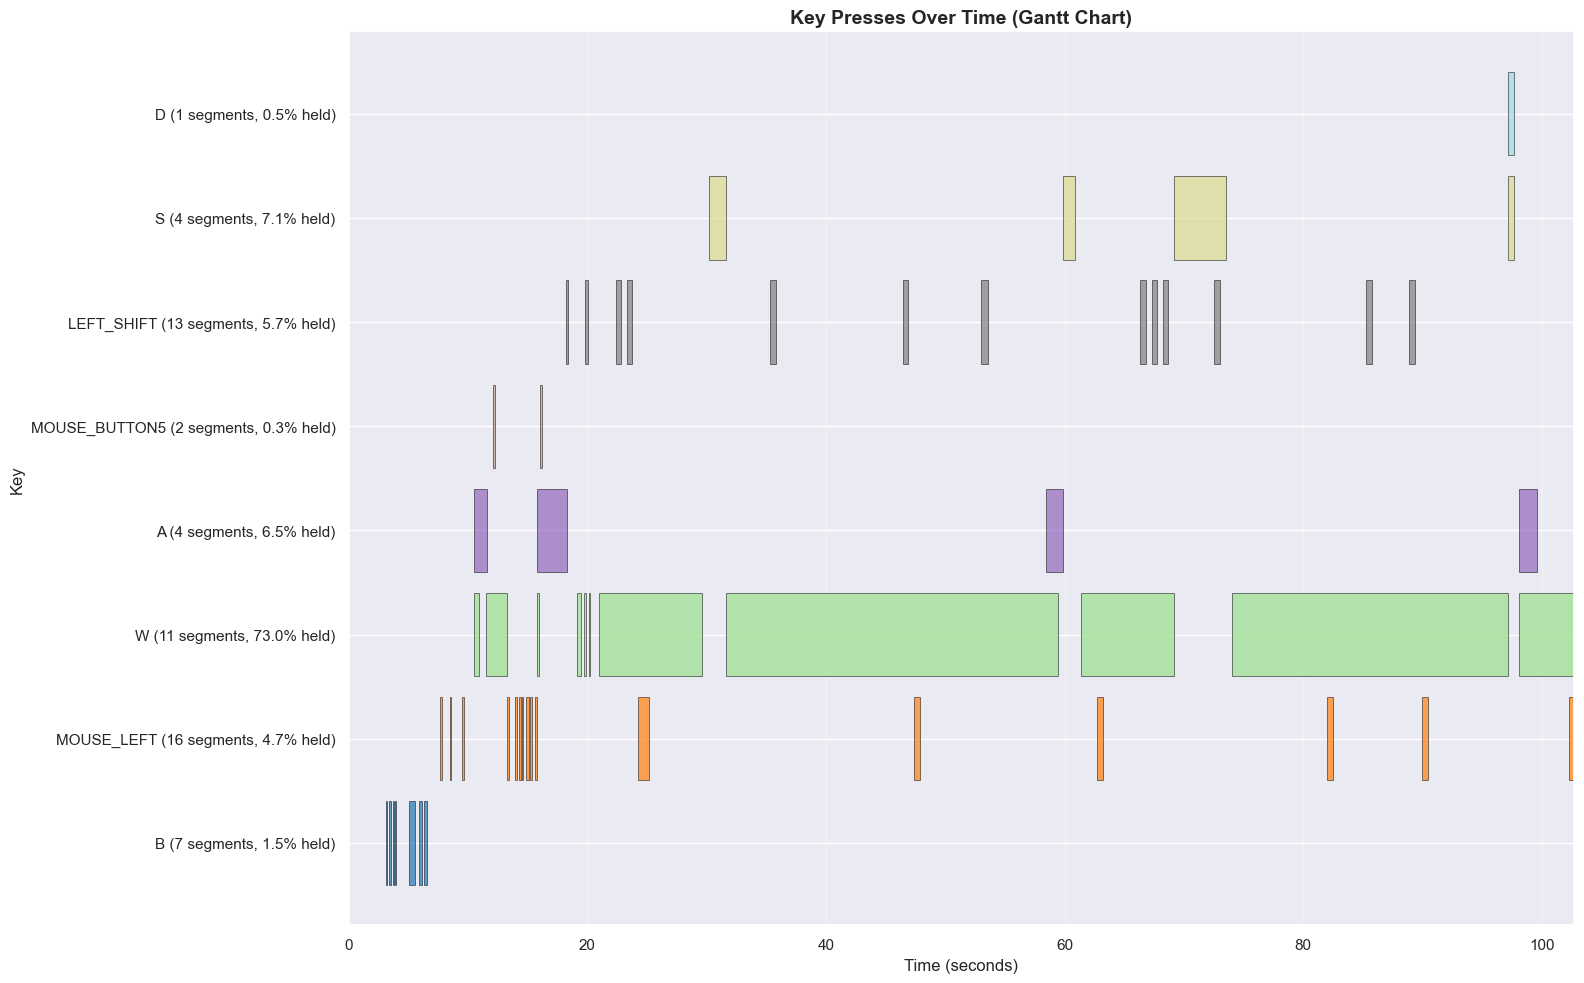


Detailed Key Press Summary:
Key                  Segments   Total Duration (s)   % Time Held     Avg Duration (s)    
B                    7          1.53                 1.5             0.22                
MOUSE_LEFT           16         4.85                 4.7             0.30                
W                    11         74.99                73.0            6.82                
A                    4          6.65                 6.5             1.66                
MOUSE_BUTTON5        2          0.34                 0.3             0.17                
LEFT_SHIFT           13         5.86                 5.7             0.45                
S                    4          7.30                 7.1             1.83                
D                    1          0.49                 0.5             0.49                


In [54]:
# Create Gantt chart for key presses
fig, ax = plt.subplots(figsize=(16, 10))

# Color map for different keys
colors = plt.cm.tab20(np.linspace(0, 1, len(key_mapping)))

y_pos = 0
yticks = []
yticklabels = []
press_stats = []

for idx, key_name in enumerate(key_mapping):
    key_data = inputs_df[key_name].values
    time_elapsed = inputs_df['time_elapsed'].values
    
    print(f"Debug {key_name}: time_elapsed range = {time_elapsed[0]:.2f} to {time_elapsed[-1]:.2f}")
    
    # Find segments where key is pressed (value > 0)
    is_pressed = key_data > 0
    
    # Find start and end of each press
    press_starts = []
    press_ends = []
    
    in_press = False
    for i, pressed in enumerate(is_pressed):
        if pressed and not in_press:
            # Start of a press
            press_starts.append(time_elapsed[i])
            in_press = True
        elif not pressed and in_press:
            # End of a press
            press_ends.append(time_elapsed[i])
            in_press = False
    
    # If still pressed at the end, close it
    if in_press:
        press_ends.append(time_elapsed[-1])
    
    # Calculate total duration
    total_duration = sum(end - start for start, end in zip(press_starts, press_ends))
    pct_held = (total_duration / time_elapsed[-1]) * 100 if time_elapsed[-1] > 0 else 0
    
    # Draw horizontal bars for each press period
    for start, end in zip(press_starts, press_ends):
        duration = end - start
        ax.barh(y_pos, duration, left=start, height=0.8, 
                color=colors[idx], alpha=0.7, edgecolor='black', linewidth=0.5)
    
    yticks.append(y_pos)
    yticklabels.append(f"{key_name} ({len(press_starts)} segments, {pct_held:.1f}% held)")
    y_pos += 1
    
    press_stats.append({
        'key': key_name,
        'segments': len(press_starts),
        'total_duration': total_duration,
        'pct_held': pct_held
    })

ax.set_yticks(yticks)
ax.set_yticklabels(yticklabels)
ax.set_xlabel('Time (seconds)', fontsize=12)
ax.set_ylabel('Key', fontsize=12)
ax.set_title('Key Presses Over Time (Gantt Chart)', fontsize=14, fontweight='bold')
ax.grid(True, axis='x', alpha=0.3)
ax.set_xlim(0, time_elapsed[-1])

plt.tight_layout()
plt.show()

# Print detailed summary statistics
print("\nDetailed Key Press Summary:")
print(f"{'Key':<20} {'Segments':<10} {'Total Duration (s)':<20} {'% Time Held':<15} {'Avg Duration (s)':<20}")
print("=" * 85)
for stat in press_stats:
    avg_duration = stat['total_duration'] / stat['segments'] if stat['segments'] > 0 else 0
    print(f"{stat['key']:<20} {stat['segments']:<10} {stat['total_duration']:<20.2f} {stat['pct_held']:<15.1f} {avg_duration:<20.2f}")


In [ ]:
# Analyze boss animations
if 'NpcAnimId' in df.columns:
    # Find when animations change
    df['npc_anim_changed'] = df['NpcAnimId'].diff() != 0
    
    # Count unique animations
    unique_npc_anims = df['NpcAnimId'].value_counts()
    
    print(f"Total unique boss animations: {len(unique_npc_anims)}")
    print(f"Total animation changes: {df['npc_anim_changed'].sum()}")
    print(f"\nTop 10 most common boss animations:")
    print(unique_npc_anims.head(10))
    
    # Plot animation changes over time
    npc_anim_changes = df[df['npc_anim_changed']]
    plt.figure(figsize=(14, 5))
    plt.scatter(npc_anim_changes['time_elapsed'], npc_anim_changes['NpcAnimId'], 
                alpha=0.6, s=20, c=npc_anim_changes['NpcAnimId'], cmap='tab20')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Animation ID')
    plt.title('Boss Animation Changes Over Time')
    plt.colorbar(label='Animation ID')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


NameError: name 'df' is not defined

## 10. Multi-Episode Comparison

Load and compare multiple episodes to track learning progress.


In [ ]:
# Function to load multiple episodes
def load_episode_summary(file_path):
    """Load summary statistics from an episode recording."""
    with h5py.File(file_path, 'r') as f:
        memory_data = f['memory_data'][:]
        timestamps = f['timestamps'][:]
        
        # Get attribute names
        if 'attribute_names' in f['memory_data'].attrs:
            attr_names = f['memory_data'].attrs['attribute_names']
            if isinstance(attr_names[0], bytes):
                attr_names = [name.decode('utf-8') for name in attr_names]
        else:
            attr_names = [f"Attr_{i}" for i in range(memory_data.shape[1])]
        
        # Create DataFrame
        df_temp = pd.DataFrame(memory_data, columns=attr_names)
        
        # Extract info from filename
        filename = Path(file_path).name
        parts = filename.split('_')
        episode_num = int(parts[1]) if len(parts) > 1 else 0
        
        # Check for condition index
        cond_idx = None
        for part in parts:
            if part.startswith('cond'):
                cond_idx = int(part.replace('cond', ''))
                break
        
        summary = {
            'filename': filename,
            'episode': episode_num,
            'condition_met': cond_idx,
            'duration': timestamps[-1] - timestamps[0],
            'frames': len(timestamps),
            'fps': len(timestamps) / (timestamps[-1] - timestamps[0])
        }
        
        # Add attribute-specific stats
        if 'HeroHp' in df_temp.columns:
            summary['final_hero_hp'] = df_temp['HeroHp'].iloc[-1]
            summary['min_hero_hp'] = df_temp['HeroHp'].min()
            summary['avg_hero_hp'] = df_temp['HeroHp'].mean()
            
        if 'NpcHp' in df_temp.columns:
            summary['final_boss_hp'] = df_temp['NpcHp'].iloc[-1]
            summary['initial_boss_hp'] = df_temp['NpcHp'].iloc[0]
            summary['boss_damage_dealt'] = df_temp['NpcHp'].iloc[0] - df_temp['NpcHp'].iloc[-1]
            
        return summary

# Example: Load all episodes from recordings directory
recordings_dir = Path("./recordings")
if recordings_dir.exists():
    episode_files = sorted(recordings_dir.glob("episode_*.h5"))
    print(f"Found {len(episode_files)} episode recordings")
    
    if len(episode_files) > 0:
        print(f"\\nLoading first 10 episodes for comparison...")
        summaries = []
        for ep_file in episode_files[:10]:  # Limit to first 10 for demo
            try:
                summary = load_episode_summary(ep_file)
                summaries.append(summary)
                print(f"  Loaded: {ep_file.name}")
            except Exception as e:
                print(f"  Error loading {ep_file.name}: {e}")
        
        # Create comparison DataFrame
        if summaries:
            comparison_df = pd.DataFrame(summaries)
            print(f"\\nLoaded {len(comparison_df)} episodes successfully")
            comparison_df
        else:
            print("No episodes loaded successfully")
    else:
        print("No episode files found in ./recordings/")
else:
    print("Recordings directory not found. Skipping multi-episode analysis.")


In [ ]:
# Visualize learning progress across episodes
if 'comparison_df' in locals() and len(comparison_df) > 0:
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    
    # Duration over episodes
    axes[0, 0].plot(comparison_df['episode'], comparison_df['duration'], marker='o', linewidth=2)
    axes[0, 0].set_xlabel('Episode Number')
    axes[0, 0].set_ylabel('Duration (seconds)')
    axes[0, 0].set_title('Episode Duration Over Time')
    axes[0, 0].grid(True, alpha=0.3)
    
    # Boss damage dealt over episodes
    if 'boss_damage_dealt' in comparison_df.columns:
        axes[0, 1].plot(comparison_df['episode'], comparison_df['boss_damage_dealt'], 
                        marker='o', linewidth=2, color='purple')
        axes[0, 1].set_xlabel('Episode Number')
        axes[0, 1].set_ylabel('Damage Dealt to Boss')
        axes[0, 1].set_title('Boss Damage Improvement Over Time')
        axes[0, 1].grid(True, alpha=0.3)
    
    # Condition met (outcome) over episodes
    if 'condition_met' in comparison_df.columns:
        outcome_colors = comparison_df['condition_met'].map({0: 'red', 1: 'green'})
        axes[1, 0].scatter(comparison_df['episode'], comparison_df['condition_met'], 
                          c=outcome_colors, s=100, alpha=0.6)
        axes[1, 0].set_xlabel('Episode Number')
        axes[1, 0].set_ylabel('Stop Condition Index')
        axes[1, 0].set_title('Episode Outcomes (0=Player Died, 1=Boss Died)')
        axes[1, 0].set_yticks([0, 1])
        axes[1, 0].grid(True, alpha=0.3)
    
    # Final player HP over episodes
    if 'final_hero_hp' in comparison_df.columns:
        axes[1, 1].plot(comparison_df['episode'], comparison_df['final_hero_hp'], 
                       marker='o', linewidth=2, color='red')
        axes[1, 1].set_xlabel('Episode Number')
        axes[1, 1].set_ylabel('Final Player HP')
        axes[1, 1].set_title('Player Survival (Final HP)')
        axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print("\\n" + "="*60)
    print("MULTI-EPISODE SUMMARY")
    print("="*60)
    if 'condition_met' in comparison_df.columns:
        wins = (comparison_df['condition_met'] == 1).sum()
        losses = (comparison_df['condition_met'] == 0).sum()
        print(f"Win rate: {wins}/{len(comparison_df)} ({wins/len(comparison_df)*100:.1f}%)")
    print(f"Average episode duration: {comparison_df['duration'].mean():.2f}s")
    if 'boss_damage_dealt' in comparison_df.columns:
        print(f"Average damage to boss: {comparison_df['boss_damage_dealt'].mean():.0f}")
        print(f"Best damage to boss: {comparison_df['boss_damage_dealt'].max():.0f}")


## 11. Export Analysis Results

Export processed data and statistics for further analysis or ML training.


In [ ]:
# Export current episode data to CSV for further analysis
output_csv = "episode_analysis.csv"
df.to_csv(output_csv, index=False)
print(f"Exported episode data to {output_csv}")

# Export multi-episode comparison if available
if 'comparison_df' in locals():
    comparison_csv = "episodes_comparison.csv"
    comparison_df.to_csv(comparison_csv, index=False)
    print(f"Exported comparison data to {comparison_csv}")

# Summary statistics
print("\\nDataset Summary:")
print(f"  Total frames: {len(df)}")
print(f"  Duration: {df['time_elapsed'].max():.2f}s")
print(f"  Attributes: {len(attribute_names)}")
print(f"  File processed: {recording_path}")


---

## Notes

This notebook provides comprehensive EDA for Elden Ring gameplay recordings:

- **Section 1-2**: Load and explore recording structure
- **Section 3**: Statistical summaries of all attributes
- **Section 4**: Health, stamina, and resource tracking
- **Section 5**: Movement patterns and trajectory visualization
- **Section 6**: Combat metrics (damage taken/dealt)
- **Section 7**: Animation analysis (player actions and boss attacks)
- **Section 9**: Input analysis and key press visualization (Gantt chart)
- **Section 10**: Multi-episode comparison and learning progress
- **Section 11**: Export results for ML training

### Tips for Analysis:

1. **Filter by outcome**: Use `condition_met` to separate wins (cond1) from losses (cond0)
2. **Track improvement**: Plot metrics across episode numbers to see skill progression  
3. **Identify patterns**: Look for correlations between animations and damage events
4. **Optimize strategy**: Compare movement patterns between successful and failed attempts
5. **Analyze inputs**: Use the Gantt chart to identify key press patterns during successful combat

### For ML Training:

- The exported CSVs contain frame-by-frame data perfect for supervised learning
- Use `condition_met` as labels for classification tasks
- Combine position, health, animation, and input data as features
- Consider temporal models (RNNs, Transformers) for sequence learning


## 12. Video Visualization

Generate a video with overlays showing inputs and game state.


In [ ]:
# You can generate a video visualization using the visualize_recording.py script
# 
# Command line usage:
# python visualize_recording.py recordings/episode_0001.h5 -o output_with_overlays.mp4
#
# Or preview a single frame:
# python visualize_recording.py recordings/episode_0001.h5 --preview 50
#
# Process only first 100 frames (faster for testing):
# python visualize_recording.py recordings/episode_0001.h5 --end 100

# Example: Generate video from the current recording (first 50 frames for demo)
print("To generate a video with overlays, run:")
print(f"  python visualize_recording.py {recording_path} --end 50")


In [ ]:
# Close the H5 file when done
h5_file.close()
print("H5 file closed successfully")


H5 file closed successfully
